![networkx logo](https://networkx.org/_static/networkx_logo.svg)

In this section, we explain social network analysis (SNA) with examples using Python NetworkX toolbox. 

We cover:
1. installation and basic configuration
2. type of graphs 
3. network metrics 

In [1]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The installation is straightforward, with a full description of the toolbox available in the link below.    
https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf

First off, we create a graph object then add edges between node pairs. 
Assume we start with five nodes, namely “Al”, “Bell”, “Chris”, “Derek” and “Ed” as a toy example.
The edges could be added by linking two nodes using add_edge command. 
The example below we present an undirected graph. 

In [3]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Al','Bell')
G_symmetric.add_edge('Al','Chris')
G_symmetric.add_edge('Al','Ed')
G_symmetric.add_edge('Al','Derek')
G_symmetric.add_edge('Bell','Chris')
G_symmetric.add_edge('Bell','Ed')
G_symmetric.add_edge('Bell','Derek')
G_symmetric.add_edge('Derek','Chris')

The function “draw_networkx” displays the network graph we just created.

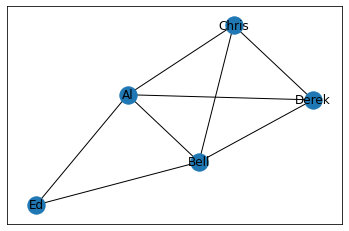

In [4]:
nx.draw_networkx(G_symmetric)

Alternatively, we could create a directed graph where edges are directed. To do so, “DiGraph” object is needed.

In [5]:
G_asymmetric = nx.DiGraph()

G_asymmetric.add_edge('Al','Bell')
G_asymmetric.add_edge('Al','Chris')
G_asymmetric.add_edge('Al','Ed')
G_asymmetric.add_edge('Al','Derek')
G_asymmetric.add_edge('Bell','Chris')
G_asymmetric.add_edge('Bell','Ed')
G_asymmetric.add_edge('Bell','Derek')
G_asymmetric.add_edge('Derek','Chris')

To visualize the graph, different visualization <a href="https://networkx.org/documentation/stable/reference/drawing.html?highlight=networkx%20drawing%20layout#module-networkx.drawing.layout">algorithms</a> could be used to determine where and how we could plot the nodes and edges.   “spring_layout” is one way to do it. 




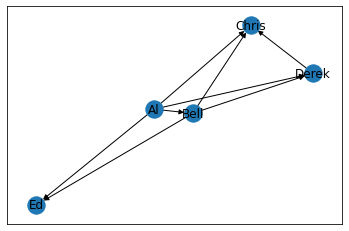

In [6]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

In the lecture we learn different network metrics, such as the degree, clustering coefficient and centrality. 
To compute the degree of a specific node is straightforward. 


The degree could be computed either for a specific node or the full list of all nodes.

In [7]:
nx.degree(G_symmetric, 'Derek')

3

In [8]:
nx.degree(G_symmetric)

DegreeView({'Al': 4, 'Bell': 4, 'Chris': 3, 'Ed': 2, 'Derek': 3})

The clustering coefficient could be reported both at the graph level (including all nodes) or at individual node level. 

In [9]:
nx.average_clustering(G_symmetric)

0.8666666666666666

In [10]:
nx.clustering(G_symmetric)

{'Al': 0.6666666666666666,
 'Bell': 0.6666666666666666,
 'Chris': 1.0,
 'Ed': 1.0,
 'Derek': 1.0}

The betweenness centrality reports how “central” an individual node is. 

In [11]:
nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)

{'Al': 0.5, 'Bell': 0.5, 'Chris': 0.4, 'Ed': 0.4, 'Derek': 0.4}

Obviously, we do wish sometimes not creating a graph on the fly. Rather, we will collect data from the web or download from other sources. Then the graph representation is stored in a matrix format - Adjacency Matrix.

Suppose we have an example graph with three nodes: Larry, Gary, Harry and a matrix represent the connection between them. 

In [12]:
import numpy as np
import pandas as pd
column_names = ['Larry', 'Gary', 'Harry']
row_names    = ['Larry', 'Gary', 'Harry']
df = pd.DataFrame([[0, 1 ,1], [1,0,1],[0,0,0]], columns=column_names, index=row_names)
A = np.array([[0, 1 ,1], [1,0,1],[0,0,0]])

In [13]:
df

,Larry,Gary,Harry
Larry,0,1,1
Gary,1,0,1
Harry,0,0,0


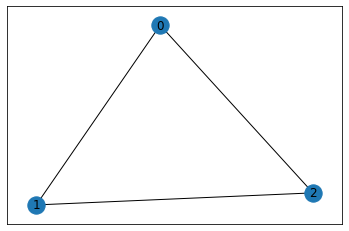

In [14]:
G = nx.from_numpy_array(A)
nx.draw_networkx(G)

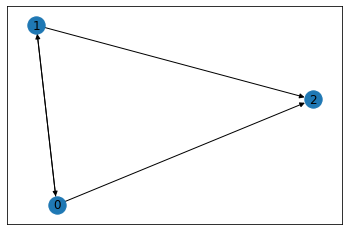

In [15]:
G = nx.from_numpy_array(A,create_using=nx.DiGraph)
nx.draw_networkx(G)

In [16]:
mapping = {0: "Larry", 1: "Gary", 2: "Harry"}
H = nx.relabel_nodes(G, mapping)

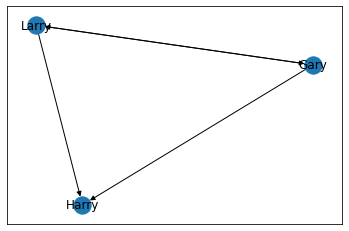

In [17]:
nx.draw_networkx(H)

Using adjacency matrix, we could convert a directed graph into an undirected one. An edge from A to B if directed, does not imply B has an edge to A. If the direction is not considered, we could convert the directed graph to an undirected one. 

In [18]:
am1=nx.adjacency_matrix(G_asymmetric).todense()
am1

array([[0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [19]:
am1_undir=np.maximum(am1.transpose(),am1)

In [20]:
g1 = nx.from_numpy_array(am1_undir,create_using=nx.Graph)
mapping = {old_label:new_label for old_label, new_label in enumerate(G_asymmetric.nodes())}
g2 = nx.relabel_nodes(g1, mapping)

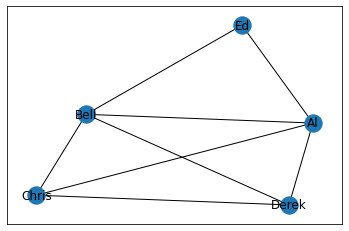

In [21]:
nx.draw_networkx(g2)

Now let’s test your “networkx” skill.
Given the graph presented below, please compute:
1. create a network object and visualize it.  
2. present the adjacency matrix
3. calculate the centrality measures (betweenness, closeness…)
4. if this is a result of a network where people share information with each other, who is the most important node in this network? 

![exercise](https://drive.google.com/uc?id=1ZmVnenbF3oWiXiV1yutq0fhMvz3lZKZH)

[[0 1 1 1 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0]]


{'A': 0.6944444444444444,
 'B': 0.4861111111111111,
 'D': 0.29166666666666663,
 'F': 0.6944444444444444,
 'C': 0.2222222222222222,
 'E': 0.25,
 'G': 0.2222222222222222,
 'I': 0.41666666666666663,
 'H': 0.2222222222222222}

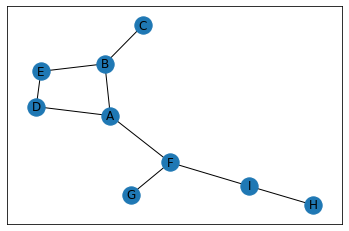

In [22]:
#possible solution
#input network
network_G = nx.Graph()
network_G.add_edge('A','B')
network_G.add_edge('A','D')
network_G.add_edge('A','F')
network_G.add_edge('B','C')
network_G.add_edge('B','E')
network_G.add_edge('D','E')
network_G.add_edge('F','G')
network_G.add_edge('F','I')
network_G.add_edge('H','I')
#draw network
nx.draw_networkx(network_G)
#adjacency matrix
am = nx.adjacency_matrix(network_G)
print(am.todense())
#closeness centrality
nx.closeness_centrality(network_G)
#betweenness centrality
nx.betweenness_centrality(network_G, normalized=True, endpoints=True)